In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
sys.path.append('..')

from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [3]:
PATH = "E:/WORKSPACES/python/DATA/dogscats/"
sz=224

# I. Train

### Define data and learner(loader and model)

In [4]:
arch = resnet34
data = ImageClassifierData.from_paths(path=PATH, 
                                      trn_name='train', val_name='valid', test_name='test1', 
                                      tfms=tfms_from_model(f_model=arch, sz=sz))
learner = ConvLearner.pretrained(f=arch, data=data, precompute=True)

### Find learning rate

 85%|███████████████████████████████████████████████████████████▎          | 305/360 [03:07<00:28,  1.93it/s, loss=0.416]

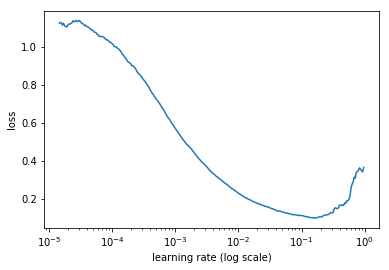

In [5]:
lrf = learner.lr_find()
learner.sched.plot()

### Train network

In [48]:
lr = 1e-2
learner.fit(lrs=lr, n_cycle=2, cycle_len=2)

epoch      trn_loss   val_loss   accuracy                                                                                
    0      0.024704   0.027942   0.9905    
    1      0.02686    0.028716   0.9895                                                                                  
    2      0.027131   0.026211   0.9925                                                                                  
    3      0.02548    0.027525   0.9895                                                                                  


[array([0.02753]), 0.9895]

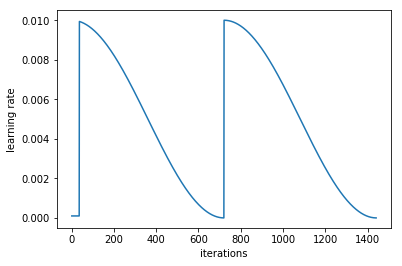

In [49]:
learner.sched.plot_lr()
# len(data.trn_ds) / 64

# II. Test

### Load data(2 ways)

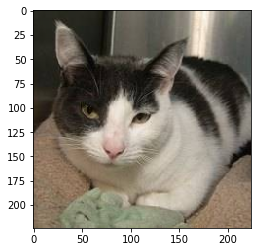

In [36]:
'''
Load data from data object then show
'''
idx = 9
img_norm = data.test_ds[idx][0] # get img from valid dataset(normalized data)
img_denorm = data.test_ds.denorm(img_norm) # de-normalize data
#print(img_norm.shape, img_denorm.shape)
plt.imshow(img_denorm[0])

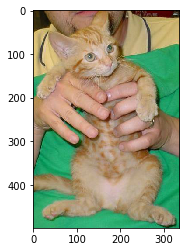

In [75]:
'''
Load data by directly reading from path then show
'''
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

img = load_img_id(data.val_ds, idx)
plt.imshow(img)

### Predict logits, labels and probabilities

In [18]:
pred_logits = learner.predict(is_test=False)
pred_labels = np.argmax(a=pred_logits, axis=1)
pred_probs = np.exp(pred_logits)
accuracy_np(pred_probs, data.val_ds[:][1])

0.991

In [77]:
print(data.classes)
# pred_logits[idx]
pred_labels[idx]
# pred_probs[idx]

['cats', 'dogs']


1

In [23]:
logits, y = learner.TTA(is_test=False)
probs = np.exp(log_preds)
accuracy_np(probs, y)

0.991